In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
#Seaborn 套件是以 matplotlib 為基礎建構的高階繪圖套件，讓使用者更加輕鬆地建立圖表，我們可以將它視為是 matplotlib 的補強
%matplotlib inline 
#魔法函式，不用一直打plt.show()
df = pd.read_csv('200811-201811.csv') #讀入資料，dataframe格式
df.head() 
#dataframe方式呈現 
#預設呈現五筆資料
#Danger分類點說明
#對敏感族群不健康為PM2.5數值在35.5以上#夭壽髒

,SO2,CO,O3,PM25,Nox,NO,NO2,THC,NMHC,CH4,WindSpeed,TEMP,Humidity,Danger
0,4.4,0.47,32.2,31,24,3.46,20.84,2.309,0.231,2.078,1.91,24.86,77.11,0
1,6.4,0.52,30.2,32,32,5.64,26.30,2.186,0.227,1.959,1.72,26.58,71.93,0
2,3.2,0.45,30.5,46,20,2.36,18.05,0.000,0.000,0.000,2.08,24.75,76.33,1
3,5.2,0.47,32.5,38,24,3.18,20.64,2.374,0.225,2.150,1.66,24.97,79.97,1
4,4.5,0.72,29.9,32,29,5.43,23.82,2.290,0.287,2.004,1.03,26.18,73.78,0


In [51]:
PM25 = df['PM25'].to_numpy()
print(sort_PM25)
print('第1四分位數',np.percentile(PM25, (25))) 
print('第2四分位數',np.percentile(PM25, (50))) 
print('第3四分位數',np.percentile(PM25, (75)))

NO2 = df['NO2'].to_numpy()
print(NO2)
print('第1四分位數',np.percentile(NO2, (25))) 
print('第2四分位數',np.percentile(NO2, (50))) 
print('第3四分位數',np.percentile(NO2, (75)))



[31 32 46 ... 49 62 57]
第1四分位數 21.0
第2四分位數 35.0
第3四分位數 47.0
[20.84 26.3  18.05 ... 11.75 27.17 28.77]
第1四分位數 12.395
第2四分位數 17.36
第3四分位數 23.509999999999998


In [45]:
def show_info(): #冒號之後開始執行程式
    print(df.info())
    print("-----------------------")
    print("前三筆資料:\n",df.head(3)) #顯示前3筆資料，預設5筆資料
    print("-----------------------")
    print("後三筆資料:\n",df.tail(3)) #顯示後3筆資料，預設5筆資料
    print("-----------------------")
    print("檔案大小:\n",df.shape)  #檔案大小(row, column)
    print("-----------------------")
    print("可供查詢標籤:\n",df.keys())
    print("-----------------------")
    return 0

In [3]:
show_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1447 entries, 0 to 1446
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SO2        1447 non-null   float64
 1   CO         1447 non-null   float64
 2   O3         1447 non-null   float64
 3   PM25       1447 non-null   int64  
 4   Nox        1447 non-null   int64  
 5   NO         1447 non-null   float64
 6   NO2        1447 non-null   float64
 7   THC        1447 non-null   float64
 8   NMHC       1447 non-null   float64
 9   CH4        1447 non-null   float64
 10  WindSpeed  1447 non-null   float64
 11  TEMP       1447 non-null   float64
 12  Humidity   1447 non-null   float64
 13  Danger     1447 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 158.4 KB
None
-----------------------
前三筆資料:
    SO2    CO    O3  PM25  Nox    NO    NO2    THC   NMHC    CH4  WindSpeed  \
0  4.4  0.47  32.2    31   24  3.46  20.84  2.309  0.231  2.078       1.91   
1  6.4 

0

In [4]:
from sklearn.preprocessing import StandardScaler  #載入標準化比例尺（StandardScaler）套件
                                                  #為使得數據得以被衡量(資料前處理)

介紹一下（StandardScaler）套件

In [5]:
#將Danger中特徵中移除，作為要預測的對象
df_modify = df.drop(columns=['Danger']) #利用drop()函式將column刪除，以當作正確預測的標籤(標準答案)。
scaler = StandardScaler()
scaler.fit(df_modify) 
scaled_features = scaler.transform(df_modify)
df_feat = pd.DataFrame(data = scaled_features,columns = df.columns[:-1]) #將修改過後的資料放入df_feat。
                                                                         #pd.DataFrame(data,特徵)
#columns=df.columns[:-1] 因為columns的數量改變了，所以重新設定column的值
#pd.DataFrame()將資料放入dataframe的格式中 #DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
print(df_feat)
print(df_modify)
print(type(df_feat))
print(type(df_modify))

           SO2        CO        O3      PM25       Nox        NO       NO2  \
0    -0.404911 -0.027934  0.442396 -0.203618  0.143374 -0.393933  0.362969   
1     0.409979  0.247408  0.186542 -0.143879  0.974468  0.438878  1.092702   
2    -0.893845 -0.138070  0.224920  0.692476 -0.272173 -0.814159 -0.009917   
3    -0.078955 -0.027934  0.480775  0.214559  0.143374 -0.500899  0.336238   
4    -0.364166  1.348773  0.148164 -0.143879  0.662808  0.358653  0.761248   
...        ...       ...       ...       ...       ...       ...       ...   
1442  2.895394  1.128500 -0.082105  1.588571  2.221110  2.096859  2.171263   
1443  0.572957  0.963295  0.711044  1.827529  0.662808 -0.092134  0.925638   
1444 -1.138312 -0.468480  0.634287  0.871695 -0.791608 -0.642248 -0.851917   
1445  1.713804  0.302476 -0.056520  1.648310  1.286129  1.195284  1.208978   
1446  2.406460  1.183568 -0.337959  1.349612  1.286129  0.740676  1.422819   

           THC      NMHC       CH4  WindSpeed      TEMP  Humidi

也可以嘗試以下寫法

In [6]:
scaler = StandardScaler()
scaler.fit(df.drop(columns=['Danger']))
scaled_features = scaler.transform(df.drop(columns=['Danger']))
df_feat = pd.DataFrame(data = scaled_features,columns = df.columns[:-1])
#columns=df.columns[:-1] 因為columns的數量改變了，所以重新設定column的值
#pd.DataFrame()將資料放入dataframe的格式中 #DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
df_feat.head()

,SO2,CO,O3,PM25,Nox,NO,NO2,THC,NMHC,CH4,WindSpeed,TEMP,Humidity
0,-0.404911,-0.027934,0.442396,-0.203618,0.143374,-0.393933,0.362969,0.840955,0.628490,0.848594,0.971649,0.946940,0.590249
1,0.409979,0.247408,0.186542,-0.143879,0.974468,0.438878,1.092702,0.718531,0.597833,0.716198,0.780465,1.077664,-0.503510
2,-0.893845,-0.138070,0.224920,0.692476,-0.272173,-0.814159,-0.009917,-1.457239,-1.141907,-1.463337,1.142708,0.938580,0.425552
3,-0.078955,-0.027934,0.480775,0.214559,0.143374,-0.500899,0.336238,0.905651,0.582505,0.928700,0.720091,0.955301,1.194140
4,-0.364166,1.348773,0.148164,-0.143879,0.662808,0.358653,0.761248,0.822044,1.057677,0.766264,0.086166,1.047263,-0.112882


先看一下原始資料，df, df_modify, df_feat

一樣是利用iloc取出資料檢查一下。

In [7]:
print(df.iloc[0]) #取原始dataframe並沒有被改變
print("----------") 
print(df_modify.iloc[0]) 
print("----------")
print(df.drop(columns = ['Danger']).iloc[0])
print("----------")
print(df_feat.iloc[0]) 
print("----------")

SO2           4.400
CO            0.470
O3           32.200
PM25         31.000
Nox          24.000
NO            3.460
NO2          20.840
THC           2.309
NMHC          0.231
CH4           2.078
WindSpeed     1.910
TEMP         24.860
Humidity     77.110
Danger        0.000
Name: 0, dtype: float64
----------
SO2           4.400
CO            0.470
O3           32.200
PM25         31.000
Nox          24.000
NO            3.460
NO2          20.840
THC           2.309
NMHC          0.231
CH4           2.078
WindSpeed     1.910
TEMP         24.860
Humidity     77.110
Name: 0, dtype: float64
----------
SO2           4.400
CO            0.470
O3           32.200
PM25         31.000
Nox          24.000
NO            3.460
NO2          20.840
THC           2.309
NMHC          0.231
CH4           2.078
WindSpeed     1.910
TEMP         24.860
Humidity     77.110
Name: 0, dtype: float64
----------
SO2         -0.404911
CO          -0.027934
O3           0.442396
PM25        -0.203618
Nox    

train_test_split()函數


In [8]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['Danger']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

為何需要設定random_state 參數?

Ans:因為可能會有overfitting問題。


附註：42為生命之數。

(根據道格拉斯·亞當斯的小說《銀河便車指南》，42是「生命、宇宙以及任何事情的終極答案」。因此，42也經常被用來向這一作品致敬，若在Siri中問「What's the meaning of life?」，Siri也會回答42。)

(若在Google輸入the answer to life, the universe, and everything，Google會直接回答42——而且還是用Google計算器算出來的。)

資料前處理正規化好了，可以開始進行訓練。

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [9]:
from sklearn.neighbors import KNeighborsClassifier
#從k值=1開始測試
knn = KNeighborsClassifier(n_neighbors=9,algorithm='auto') #n_neighbors,int類型，預設為5，意指找幾個鄰居。
                                          #algorithm：有'auto','ball_tree','kd_tree','brute'幾種選擇，
                                          #可選用於計算最近鄰居的算法，'auto'將嘗試根據傳遞給fit()方法的值來決定最合適的算法。                
knn.fit(X_train,y_train) #將資料做訓練
pred = knn.predict(X_test)
print(knn.score(X_test,y_test))

0.9494252873563218


In [10]:
# 訓練 KNN 並預測結果
k = 9   # 選擇 K 值
weights = 'uniform'  # 選擇權重：'uniform' 或 'distance'

model = KNeighborsClassifier(n_neighbors=k, weights=weights)
model.fit(X_train,y_train)  # 訓練模型
predict = model.predict(X_test)  # 對測試集特徵預測標籤
test_score = model.score(X_test, y_test) * 100  # 對測試集的預測準確率
print(test_score)

94.94252873563218


- kD-tree

有一種資料結構叫做 kD-tree, 其中 k 指的是 instance 的 attribute 個數。 基本原理是將 instance 透過 axis 的切割將之以 binary tree 的方式儲存, 底下為一簡單範例 (attribute 個數=k=2):

- 理論上一平面只有一個點
- 定義簡單，但實作上有困難

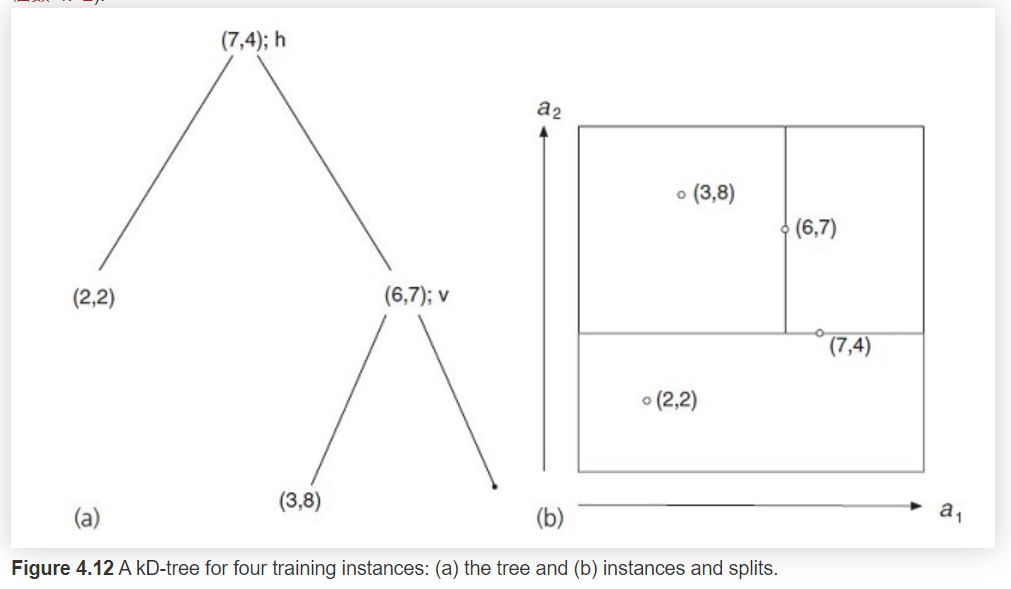

ball_tree 演算法

ball_tree 演算法
-


1. 計算 (training instance) set 的 centroid 並找出 set 中離該 centroid 最遠的一點. 稱為 p1
2. 找出 set 中離第一步計算出來的點最遠的點. 稱為 p2
3. 將 set 其它點與 step1, step2 計算出來的兩點進行 clustering (計算每一點離p1, p2 哪點近, 如果離 p1 近則將該點與 p1 形成一個新的 set, 否則與 p2 形成一個 set)
4. 將第三步計算出來的 set 再重複 step1,2,3 直到該 set 只剩下一個點即結束.

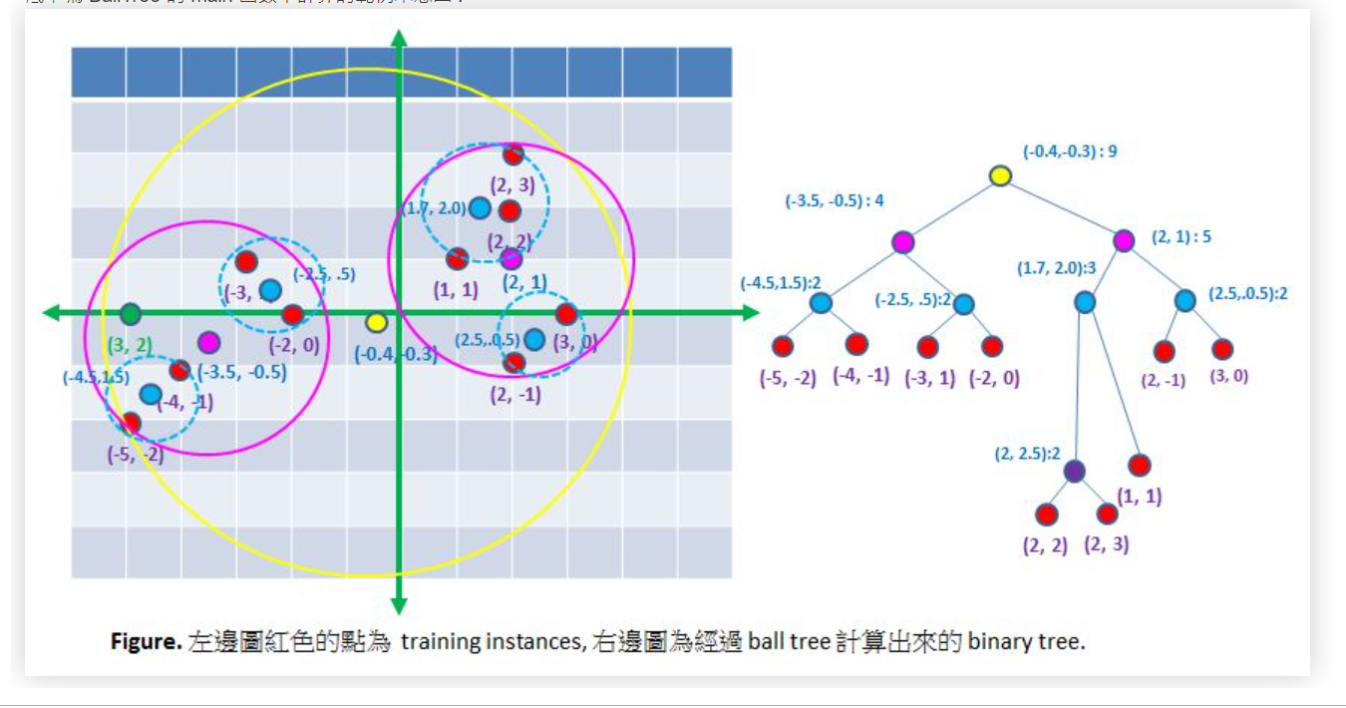

# 視覺化

降維PCA，跟圖表視覺化。

特徵太多了，不知道哪個有用，所以利用PCA(主成分分析)，選出特徵進行視覺化。(選出兩個特徵，作平面圖)(三個特徵做立體圖)

In [11]:
#使用混淆矩陣
#from sklearn.metrics import classification_report,confusion_matrix
#print(confusion_matrix(y_test,y_pred_NB))
#print(classification_report(y_test,y_pred_NB))

In [12]:
df.columns #先看原始df的colunm有幾個()意即有多少維度。

Index(['SO2', 'CO', 'O3', 'PM25', 'Nox', 'NO', 'NO2', 'THC', 'NMHC', 'CH4',
       'WindSpeed', 'TEMP', 'Humidity', 'Danger'],
      dtype='object')

In [13]:
#PCA練習
from sklearn.decomposition import PCA
dx = df.loc[:,['SO2', 'CO', 'O3', 'PM25', 'Nox', 'NO', 'NO2', 'THC', 'NMHC', 'CH4',
       'WindSpeed', 'TEMP', 'Humidity', 'Danger']].to_numpy()
                                                #loc後面用column名字，.iloc用串列。
                                                #因為PCA只能針對數值運算，故須先將資料型態轉為numpy，利用to_numpy()函式。
print(type(dx))
print(dx)

<class 'numpy.ndarray'>
[[ 4.4   0.47 32.2  ... 24.86 77.11  0.  ]
 [ 6.4   0.52 30.2  ... 26.58 71.93  0.  ]
 [ 3.2   0.45 30.5  ... 24.75 76.33  1.  ]
 ...
 [ 2.6   0.39 33.7  ...  0.   77.3   1.  ]
 [ 9.6   0.53 28.3  ...  0.   72.17  1.  ]
 [11.3   0.69 26.1  ...  0.   73.41  1.  ]]


In [14]:
pca = PCA().fit(dx) #PCA只能針對數字化格式。

In [15]:
#列出feature並依PCA評分的順序排列。
indexes = np.argmax(np.abs(pca.components_), axis=1)
var_ratio = pca.explained_variance_ratio_ * 100 #百分比化

for i, idx in enumerate(indexes):  #令idx為indexes的指標進行迴圈
    print(f'PC{i+1} ({var_ratio[i]:.5f} %) ' +  f'feature {idx} ({[idx]})')

PC1 (64.73557 %) feature 3 ([3])
PC2 (16.88656 %) feature 11 ([11])
PC3 (11.84227 %) feature 2 ([2])
PC4 (3.24127 %) feature 2 ([2])
PC5 (2.36695 %) feature 12 ([12])
PC6 (0.42259 %) feature 0 ([0])
PC7 (0.25532 %) feature 5 ([5])
PC8 (0.20565 %) feature 7 ([7])
PC9 (0.02940 %) feature 10 ([10])
PC10 (0.00938 %) feature 13 ([13])
PC11 (0.00394 %) feature 5 ([5])
PC12 (0.00076 %) feature 1 ([1])
PC13 (0.00035 %) feature 1 ([1])
PC14 (0.00000 %) feature 8 ([8])


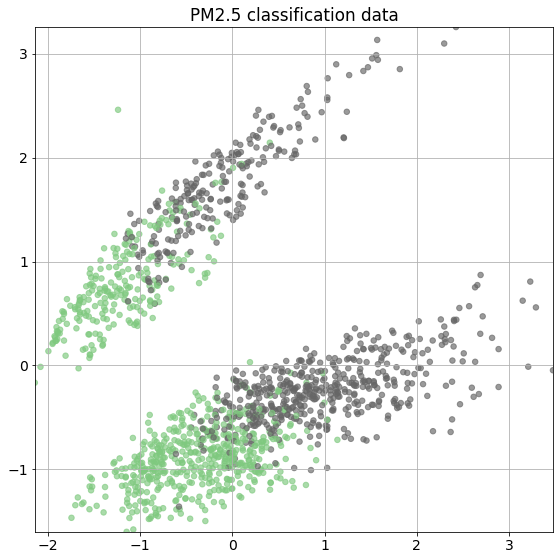

[[-0.03901573 -0.79740447]
 [ 0.50715743 -0.25057862]
 [-0.79781138  1.36253801]
 ...
 [-0.70246551  1.08034389]
 [ 1.53393042 -0.16427905]
 [ 1.76496933 -0.32384243]]
<class 'numpy.ndarray'>
[[-0.03901573  0.50715743 -0.79781138 ... -0.70246551  1.53393042
   1.76496933]
 [-0.79740447 -0.25057862  1.36253801 ...  1.08034389 -0.16427905
  -0.32384243]]
<class 'pandas.core.series.Series'>


In [16]:
# 匯入套件

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# 取出資料
dx = df_feat
dy = df.Danger
# 用 PCA 留下變異度最大的 2 個特徵
dx = PCA(n_components=2).fit_transform(dx)
# 特徵資料標準化 (將特徵資料縮放到平均=0, 標準差=1)
dx = StandardScaler().fit_transform(dx)
# 分割資料集 (80% 訓練集, 20% 測試集), 分割亂樹種子=42
dx_train, dx_test, dy_train, dy_test = train_test_split(dx, dy, test_size=0.2, random_state=42)

# 繪圖
plt.figure(figsize=(8, 8))  # 設定新圖表大小
plt.rcParams['font.size'] = 14  # 設定圖表字體大小
plt.title('PM2.5 classification data')  # 圖表標題
# 將資料繪成散佈圖 (根據標籤分顏色)
plt.scatter(*dx.T,c=dy,cmap='Accent', s=30, alpha= 0.66) 
            #plt.scatter(x,y) X標量跟Y標量，X跟Y必須是相同長度的數列。
            #x, y:float or array-like, shape (n, )  The data positions.
            #s: float or array-like, shape (n, ), optional #大小
                #The marker size in points**2. Default is rcParams['lines.markersize'] ** 2.
            #c: array-like or list of colors or color, optional #dy目前裡面有兩個數據 0&1，故圖會呈現兩個顏色
                #The marker colors. Possible values:
                    #A scalar or sequence of n numbers to be mapped to colors using cmap and norm.
                    #A 2-D array in which the rows are RGB or RGBA.
                    #A sequence of colors of length n.
                    #A single color format string.
            #cmapstr or Colormap, default: rcParams["image.cmap"] (default: 'viridis')
                    #A Colormap instance or registered colormap name. cmap is only used if c is an array of floats
            #alpha: 0~1之間，點深淺。
plt.grid(True)  # 繪製格線
# 設定 X 與 Y 軸顯示範圍
plt.xlim([np.amin(dx.T[0]), np.amax(dx.T[0])]) #plt.xlim()表示X軸顯示的範圍 
                                               #np.amin(dx.T[0])表示獲取第[0]列的最小值，以此類推。
                                                                    # 為何要轉置？ 見下面"轉置矩陣示意"
                                               #np.amax(dx.T[0])表示獲取第[0]列的最大值，以此類推。
                                               #"dx.T"表轉置矩陣。
plt.ylim([np.amin(dx.T[1]), np.amax(dx.T[1])]) 
plt.tight_layout()  # 減少圖表的白邊
plt.show()  # 顯示圖表
print(dx) #dx現在為一個2維陣列，代表用PCA提出的兩個標準化過後的特徵值
print(type(dx))
print(dx.T)
print(type(dy))

# 轉置矩陣示意

__________________

In [17]:
arr = np.arange(16).reshape(8,2) #8列2行依序排好的ndarray。[0,1,...,14,15]
print(arr)
print("-----------------------")
print("轉置矩陣：\n",arr.T) #轉置矩陣 #2列8行
print("-----------------------")
print("ndarray搜尋順序，由上而下，由左而右：\n",arr.T[0])
print("-----------------------")

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]]
-----------------------
轉置矩陣：
 [[ 0  2  4  6  8 10 12 14]
 [ 1  3  5  7  9 11 13 15]]
-----------------------
ndarray搜尋順序，由上而下，由左而右：
 [ 0  2  4  6  8 10 12 14]
-----------------------


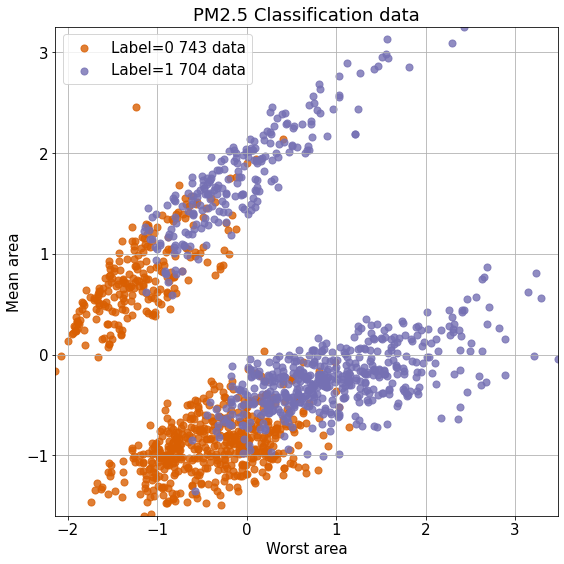

In [18]:
from sklearn.decomposition import PCA #降維，PCA主成分分析
from sklearn.preprocessing import StandardScaler #標準化工具
from sklearn.model_selection import train_test_split #train，test工具
import matplotlib.pyplot as plt 
from matplotlib import cm #外部函數庫，更改顏色
import numpy as np
dx = df_feat
dy = df.Danger
# 取出標籤名稱
class_names = df_feat.columns
# 統計標籤種類和數量
classes, class_num = np.unique(dy, return_counts=True)   #np.unique()這邊給入兩個參數，返回兩個值，
                                                         #返回陣列的排序後的唯一值
                                                         #如果 return_counts=True，返回輸入陣列中每個唯一值的計數陣列。
                                                         #故此時的classes為[0,1](因為'Danger'只有兩個元素0和1)
                                                         #然後此時的class_num，分別為[0,1]的總數[743, 704]
                                                        
dx = PCA(n_components=2).fit_transform(dx) #利用PCA(函式選出兩個特徵，參數n_component為要娶幾個特徵)
                                           #並將其fit_transform()，亦即先將資料擬合，再做標準化。
                                           #tranform() 的作用是通過找中心和縮放等實現標準化
                                           #但要將其作transform()前，必須先fit()，為了方便，所以使用fit_transform()函式
dx = StandardScaler().fit_transform(dx)    #再將其用StandardScaler()的 fit_transform()方法再做標準化。

dx_train, dx_test, dy_train, dy_test = train_test_split(dx, dy, test_size=0.2, random_state=0)   
#分測試、訓練集。輸入四個參數，返回四個值並給定為dx_train, dx_test, dy_train, dy_test

plt.figure(figsize=(9, 9)) #圖形size
plt.rcParams['font.size'] = 15 #字體大小
plt.title('PM2.5 Classification data')
# 根據分類分開畫資料點和加上圖例
color = [cm.Dark2.colors[1], cm.Dark2.colors[2]] #dy中 0的顏色為"cm.Dark2.colors[1]"，1的顏色為"cm.Dark2.colors[2]"
for label in classes: #在classes中搜尋，(class中 只有0,1)
    data = dx[dy==label] 
    plt.scatter(*data.T, color=color[label], s=50, alpha=0.8,\
                label=f'Label={label} ' + f'{class_num[label]} data') #圖例內容
    
plt.legend()  # 顯示圖例
plt.grid(True) #顯示網格 #grid(boolean) 
plt.xlabel('Worst area') #X軸的標籤(名字)
plt.ylabel('Mean area')  #Y軸的標籤(名字)
plt.xlim([np.amin(dx.T[0]), np.amax(dx.T[0])])
plt.ylim([np.amin(dx.T[1]), np.amax(dx.T[1])])
plt.show()

#743個危險
#704個不危險

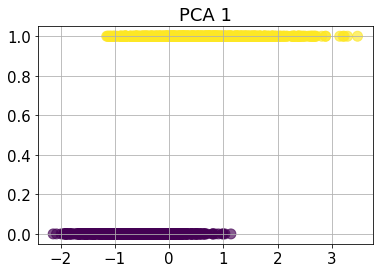

In [19]:
plt.scatter(dx.T[0], dy, c=dy, s= 100, alpha=0.66)
plt.title('PCA 1') #PCA算出來第一高特徵
plt.grid(True)  # 繪製格線 

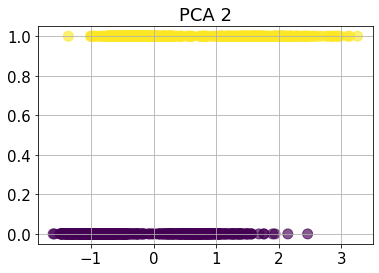

In [20]:
plt.scatter(dx.T[1], dy, c=dy, s= 100, alpha=0.66)
plt.title('PCA 2')
plt.grid(True)  # 繪製格線 #PCA算出來第二高特徵

In [21]:
print(class_names)
print(class_num)
print(classes)

Index(['SO2', 'CO', 'O3', 'PM25', 'Nox', 'NO', 'NO2', 'THC', 'NMHC', 'CH4',
       'WindSpeed', 'TEMP', 'Humidity'],
      dtype='object')
[743 704]
[0 1]


In [22]:
print(dy.value_counts())

0    743
1    704
Name: Danger, dtype: int64


以下為另一種寫法，更有易讀性！(將參數提出)

In [23]:
# 訓練 KNN 並預測結果
k = 9   # 選擇 K 值
weights = 'uniform'  # 選擇權重：'uniform' 或 'distance'

model = KNeighborsClassifier(n_neighbors=k, weights=weights)
model.fit(dx_train, dy_train)  # 訓練模型
predict = model.predict(dx_test)  # 對測試集特徵預測標籤
test_score = model.score(dx_test, dy_test) * 100  # 對測試集的預測準確率
print(test_score)

88.27586206896552


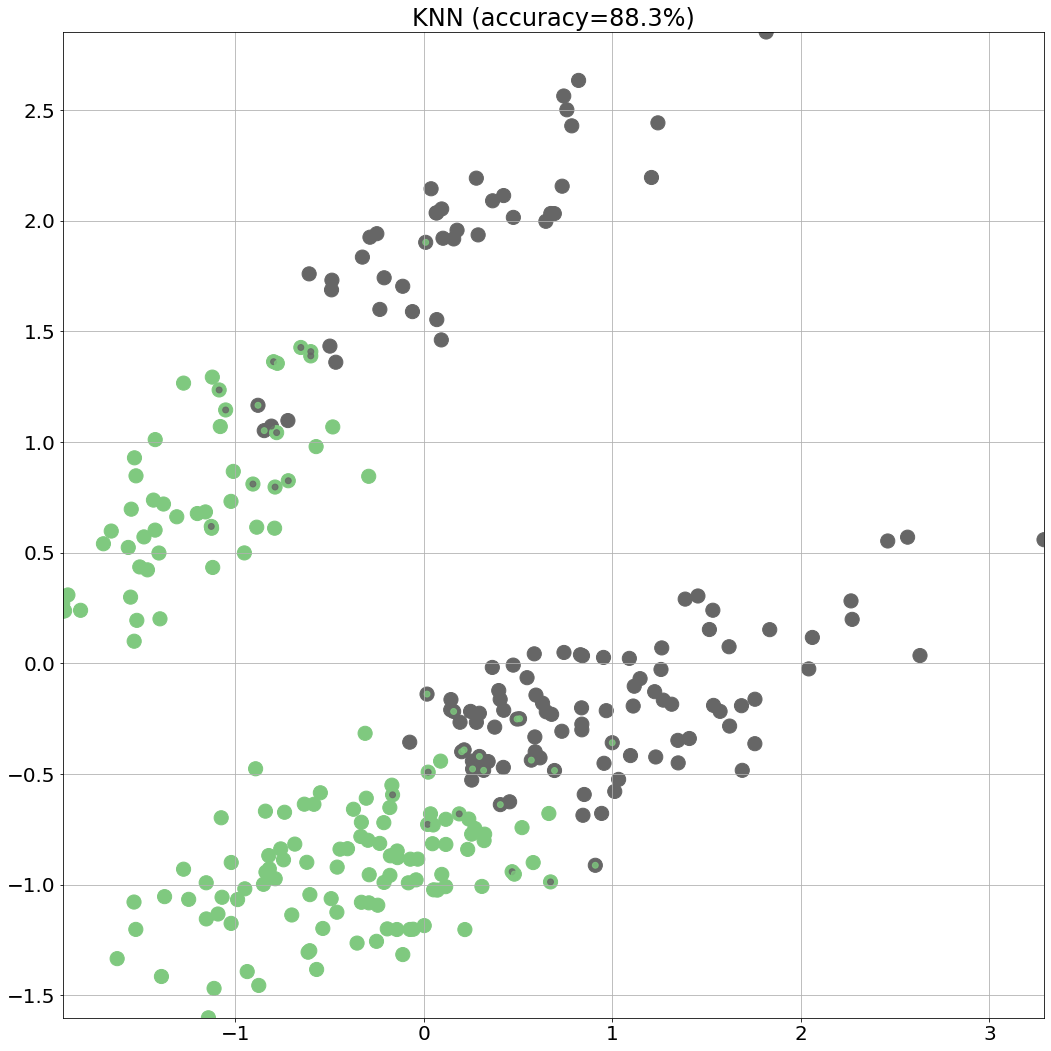

In [24]:
#畫底圖
plt.figure(figsize=(15, 15))
plt.rcParams['font.size'] = 20
plt.title(f'KNN (accuracy={test_score:.1f}%)')

# 畫出訓練集資料
# 預測標籤 (大圓)
plt.scatter(*dx_test.T, c=predict, cmap='Accent', s=200, alpha=1)
# 實際標籤 (小圓)
plt.scatter(*dx_test.T, c=dy_test, cmap='Accent', s=35, alpha=0.8)
plt.grid(True)
plt.xlim([np.amin(dx_test.T[0]), np.amax(dx_test.T[0])])
plt.ylim([np.amin(dx_test.T[1]), np.amax(dx_test.T[1])])
plt.tight_layout()
plt.show()

In [25]:
print(np.unique(dy, return_counts=True, return_index=True)) #np.unique() 

(array([0, 1], dtype=int64), array([0, 2], dtype=int64), array([743, 704], dtype=int64))


混淆矩陣
-

- 混淆矩陣的每一列都代表一個實際的類別，每一行都代表一個預測的類別

- 使用混淆矩陣

In [26]:
#使用混淆矩陣
from sklearn.metrics import classification_report,confusion_matrix
print('KNN預測混淆矩陣：\n' ,confusion_matrix(y_test,pred)) #(實際答案，預測出的答案)
print('---------------------------------')
y_train_perfect_predictions = y_test   #假設預測出完美的結果
print('超完美混淆矩陣：\n',confusion_matrix(y_test, y_train_perfect_predictions)) 
print('---------------------------------')
print('混淆矩陣樣式：\n')
print('               預測       ')
print('               結果       ')
print('            N   ,  P    ')
print(' 實際 N  [  TN  ,  FP  ] ')
print(' 結果 P  [  FN  ,  TP  ] ')
print('---------------------------------')
print(classification_report(y_test,pred))

KNN預測混淆矩陣：
 [[206  13]
 [  9 207]]
---------------------------------
超完美混淆矩陣：
 [[219   0]
 [  0 216]]
---------------------------------
混淆矩陣樣式：

               預測       
               結果       
            N   ,  P    
 實際 N  [  TN  ,  FP  ] 
 結果 P  [  FN  ,  TP  ] 
---------------------------------
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       219
           1       0.94      0.96      0.95       216

    accuracy                           0.95       435
   macro avg       0.95      0.95      0.95       435
weighted avg       0.95      0.95      0.95       435



- precison(精度) = 宣稱為對且真正為對的有多少？

In [27]:
print('               TP     ')
print('precision = ——————————')
print('             TP + FP  ')

               TP     
precision = ——————————
             TP + FP  


- Recall( 召回率)= 實際上有多少"對"被找出來

In [28]:
print('            TP     ')
print('recall = ——————————')
print('          TP + FN  ')

            TP     
recall = ——————————
          TP + FN  


也可以這樣呼叫F1 分數。

In [29]:
from sklearn.metrics import f1_score
f1_score(y_test,pred)

0.9495412844036697

Precision / Recall  取捨
-

- Precison / Recall 問題：
  precision值與 Recall值無法兼得。為什麼？
------
- 可以看上面視覺化的圖

------
- 因為資料分布在一個區間，所以會有 Precison / Recall 問題。
------
- 甚麼時候需要高精度？(高精度，低召回率)甚麼時候需要高召回率？(低精度，高召回率)
------
- 例如分辨適合兒童觀賞之影片(拒絕很多好影片(低recall)，只會留下安全的影片(高precision))，嚴格的保安系統
    警報會一直響，但幾乎可以抓到所有小偷(但會有很多假警報)(低precision、高recall)。
------
- 提高precision會降低recall，此稱為 Precision/ Recall 取捨問題。

F1 分數
-
- 可以將precision與recall結合成單一標準。
- F1分數式 precision與 recall的調和平均數(見下面公式)。
    計算平均數時，會平等地看待每一個值，但調和平均數會賦予小值跟高的權重。
- 因此，只有當recall 與 precision 分數都很高時，分類器F1的分數才會高。

公式
-

In [30]:
print('                                                                    ')
print('               TP                                                   ')
print('       ————————————————————          precision x  recall            ')
print(' F1 =          FN + FP       = 2 X ——————————————————————————       ')
print('       TP +  —————————————           precision +  recall            ')
print('                  2                                                 ')

                                                                    
               TP                                                   
       ————————————————————          precision x  recall            
 F1 =          FN + FP       = 2 X ——————————————————————————       
       TP +  —————————————           precision +  recall            
                  2                                                 


Naive Bayes 簡單貝式分類
-

同理，上述資料也可用做 Naive Bayes

In [31]:
# from sklearn.naive_bayes import GaussianNB

from sklearn import naive_bayes

# build model
model_NaiveBayes = naive_bayes.GaussianNB()
#kernel要調的好, 但會有過度學習的狀況

# training data
model_NaiveBayes.fit(X_train, y_train) 

# predict
y_pred_NB=model_NaiveBayes.predict(X_test)

GaussianNB假設特徵的先驗概率爲正態(常態)分佈，即如下式：
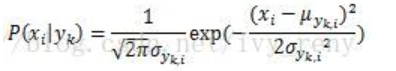
- 其中和分別表示類別爲yk的樣本中第i維特徵的均值和方差，需要從訓練集中估計。
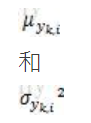
- GaussianNB類的主要參數僅有一個，即先驗概率priors。對應Y的各個類別的先驗概率。
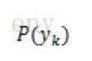
- 這個值預設不給出，如果不給出，此時。
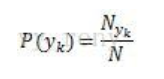
- 其中N爲訓練集樣本總數量，Nyk爲輸出爲第k類別的訓練集樣本數。如果給出的話就以priors 爲準。

- 定義太多太麻煩，可以看下面懶人包。

sklearn官方給出的解釋如下：
- 
priors：array-like of shape (n_classes,)
Prior probabilities of the classes. If specified the priors are not adjusted according to the data.

也就是說，直接假設某種情況下就是多少機率，而不根據數據來算。

In [32]:
# print result
print(y_pred_NB)
print("----------------------------------------")
print(type(y_pred_NB))
print("----------------------------------------")
print(np.unique(y_pred_NB, return_counts=True))
print("----------------------------------------")
print(y_test.to_numpy()) #原本為Series型態，改為numpy形式
print("----------------------------------------")
print(type(y_test))
print("----------------------------------------")
print(np.unique(y_test.to_numpy(), return_counts=True))
print("----------------------------------------")

[0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1
 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0
 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0
 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0
 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1
 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1
 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0
 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1]
----------------------------------------
<class 'numpy.ndarray'>
----------------------------------------
(array([0, 

練習：
- 
可以試著將Naive Bayes的混淆矩陣印出。

In [33]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred_NB))
print('---------------------------------')
print(classification_report(y_test,y_pred_NB))

[[204  15]
 [ 31 185]]
---------------------------------
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       219
           1       0.93      0.86      0.89       216

    accuracy                           0.89       435
   macro avg       0.90      0.89      0.89       435
weighted avg       0.90      0.89      0.89       435



練習：視覺化表示Naive Bayes 的結果(平面圖)。

可以參考上面的程式碼，改參數就好。

In [34]:
from sklearn import naive_bayes

model_NaiveBayes.fit(dx_train, dy_train)  # 訓練模型
predict_NaiveBayes = model_NaiveBayes.predict(dx_test)  # 對測試集特徵預測標籤
test_score_NaiveBayes = model_NaiveBayes.score(dx_test, dy_test) * 100  # 對測試集的預測準確率
print(test_score_NaiveBayes)

86.89655172413792


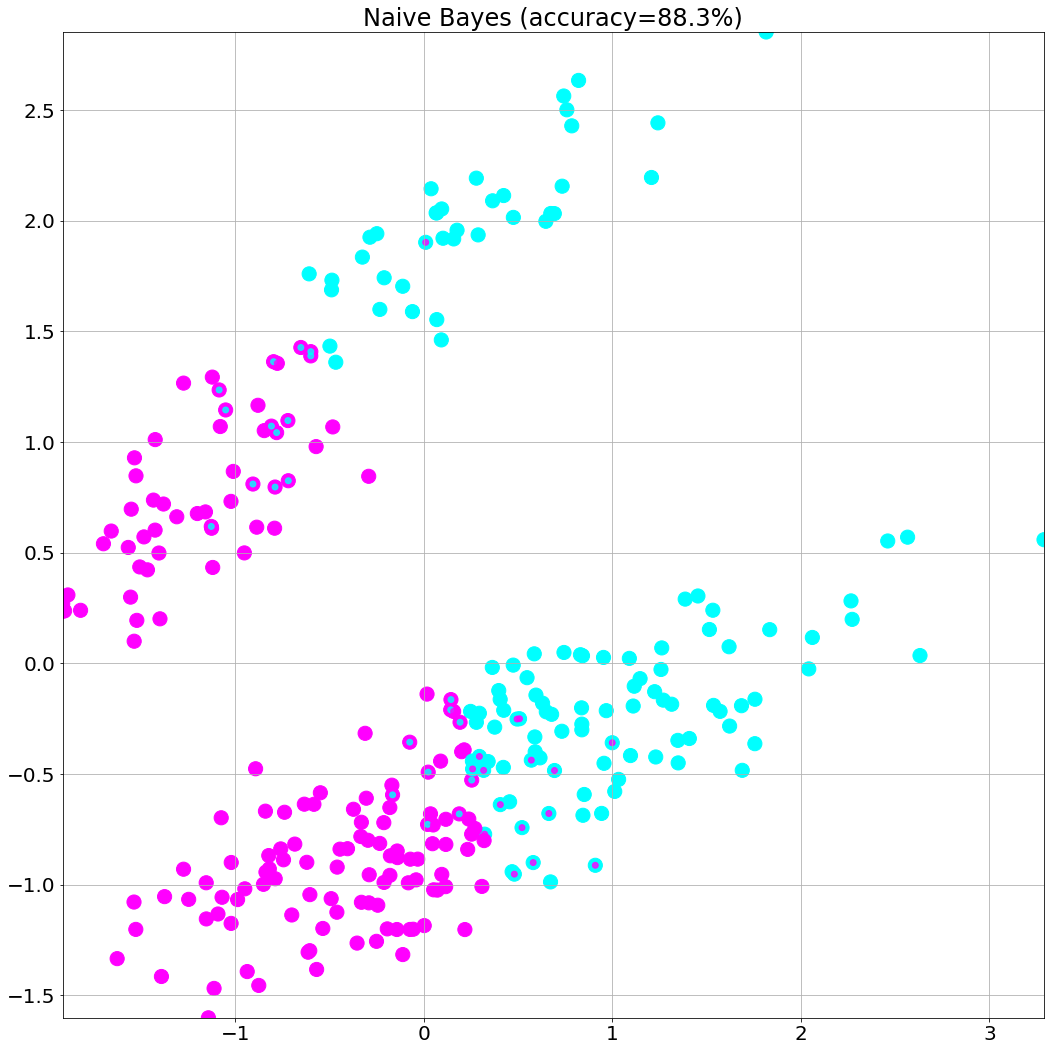

In [35]:
#畫底圖
plt.figure(figsize=(15, 15))
plt.rcParams['font.size'] = 20
plt.title(f'Naive Bayes (accuracy={test_score:.1f}%)')

# 畫出訓練集資料
# 預測標籤 (大圓)
plt.scatter(*dx_test.T, c=predict_NaiveBayes, cmap='cool_r', s=200, alpha=1)
# 實際標籤 (小圓)
plt.scatter(*dx_test.T, c=dy_test, cmap='cool_r', s=35, alpha=0.8)
plt.grid(True)
plt.xlim([np.amin(dx_test.T[0]), np.amax(dx_test.T[0])])
plt.ylim([np.amin(dx_test.T[1]), np.amax(dx_test.T[1])])
plt.tight_layout()
plt.show()


Decision Trees
-

- 使用sklearn.tree 巨集中 DecisionTreeClassifier()函式。
可以使用的參數如下：
- criterion{“gini”, “entropy”}, default=”gini” #使用gini值或是entropy 值
- max_depth= int, default=None, 最大樹深，預設把所有展開到點為純淨的。
- min_samples_leafint or float, default=1 ，在葉節點處需要的最小樣本數。僅在任何深度的分割點在左分支和右分支中的每個分支上至少留下min_samples_leaf個訓練樣本時，才考慮該點。
- etc


In [36]:
#使用決策樹模型
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier( criterion='entropy' ,max_depth=6, random_state=42)#(樹深，隨機種子)
tree_clf.fit(dx_train, dy_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

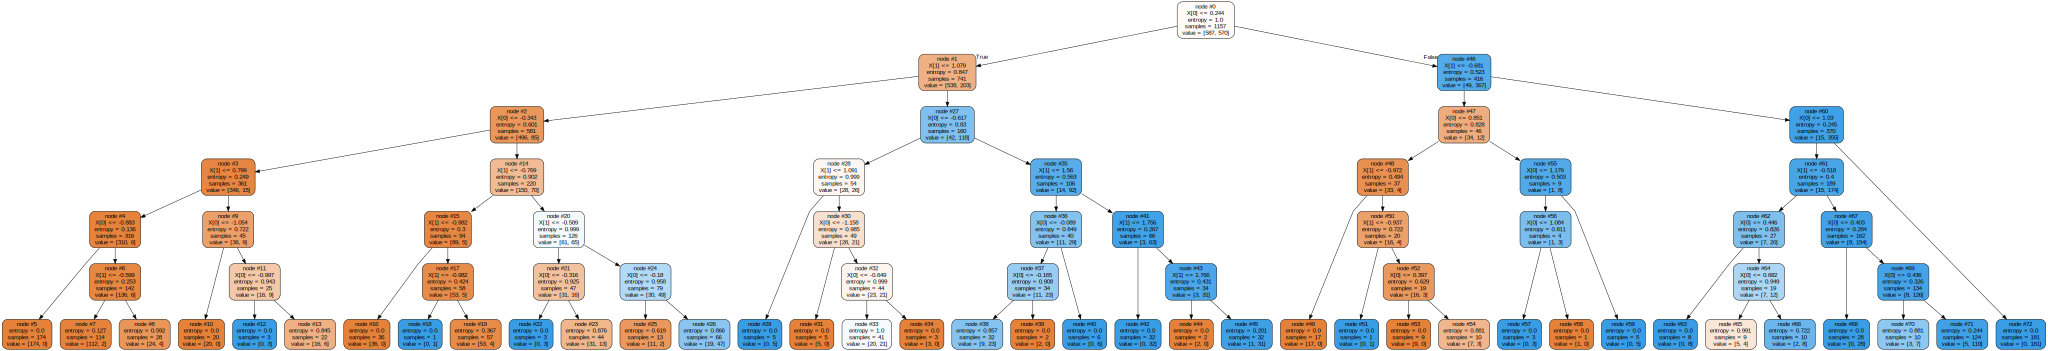

In [37]:
from graphviz import Source    #如果出現error：'No module named 'graphviz'，使用"conda install python-graphviz"
from sklearn.tree import export_graphviz

#將決策樹導出至 GraphViz
#更多參數及相關資料請google "export_graphviz

tree_pic = export_graphviz(
        tree_clf,
        out_file=None,    #設為none會回傳一個字串
        rounded=True,      #圓邊，boolean
        filled=True,       #填滿顏色(根據純度)，boolean
        node_ids=True,      #顯示節點號碼，boolean
        precision= 3,
        leaves_parallel=True #顯示所有葉節點，boolean     
    )

#Source.from_file(os.path.join(IMAGES_PATH, "tree.dot"))
Source(tree_pic) #語法： Source(export_graphviz())

可以只用決策樹來決定該留下那些特徵嗎？

In [38]:
from sklearn.tree import DecisionTreeClassifier

tree_2 = DecisionTreeClassifier( max_features= 6 ,criterion='gini' ,max_depth=6, random_state=42,splitter = 'random')#(樹深，隨機種子)
tree_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features=6, random_state=42,
                       splitter='random')

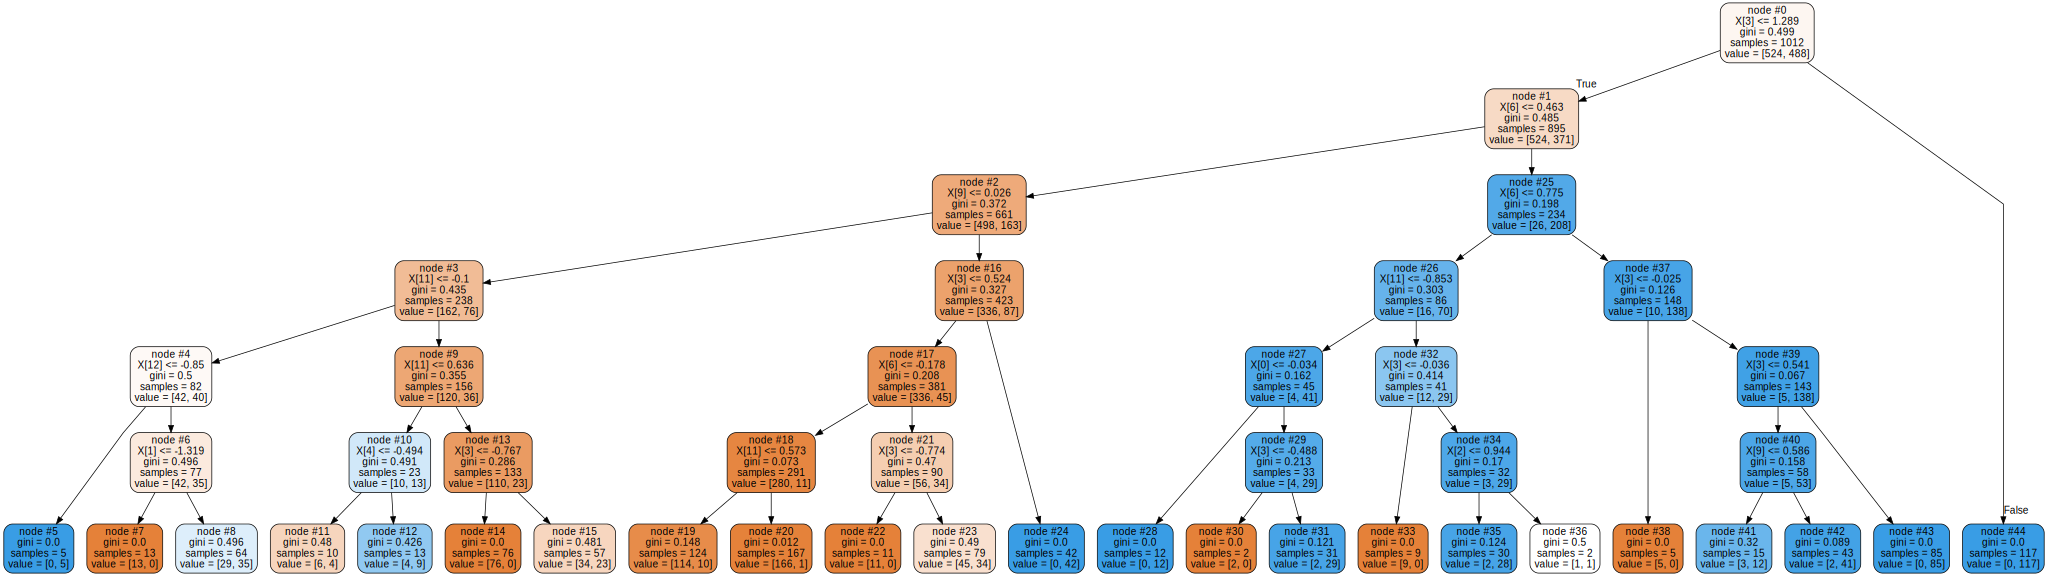

In [39]:
from graphviz import Source    #如果出現error：'No module named 'graphviz'，使用"conda install python-graphviz"
from sklearn.tree import export_graphviz

#將決策樹導出至 GraphViz
#更多參數及相關資料請google "export_graphviz

tree_pic = export_graphviz(
        tree_2,
        out_file=None,    #設為none會回傳一個字串
        rounded=True,      #圓邊，boolean
        filled=True,       #填滿顏色(根據純度)，boolean
        node_ids=True,      #顯示節點號碼，boolean
        leaves_parallel=True #顯示所有葉節點，boolean     
    )

#Source.from_file(os.path.join(IMAGES_PATH, "tree.dot"))
Source(tree_pic) #語法： Source(export_graphviz())

Graphviz
- 

- Graphviz是一個開源的圖（Graph）視覺化軟體，採用抽象的圖和網路 來表示結構化的資訊。在資料科學領域，Graphviz的一個用途就是實現 決策樹視覺化。我將graphviz方法放在matplotlib方法之後，是因為這個軟體用起來有點複雜。

- 為了將決策樹視覺化，首先需要建立一個dot檔案來描述決策樹，這個倒不難。問題在於使用Graphviz將dot檔案轉換為圖形檔案，例如png、jpg等等 可能會有點難度。

- 有一些辦法來降低graphviz的使用門檻，例如通過Anaconda安裝python-graphviz、 利用mac的homebrew安裝grahpviz、利用官方提供的windows安裝檔案、或者使用 線上轉換器將決策樹的dot檔案轉換為圖形：

- 本課程使用jupyternotebook，透過 Anaconda安裝python-graphviz。

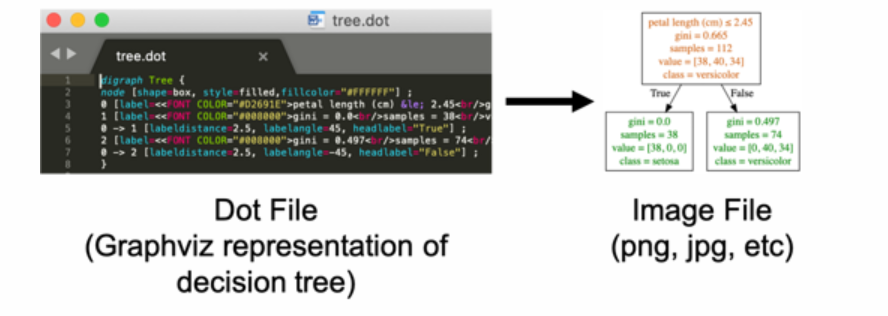

In [40]:
#評估決策樹模型好壞
predictions = tree_clf.predict(dx_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(dy_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       156
           1       0.84      0.90      0.87       134

    accuracy                           0.88       290
   macro avg       0.88      0.88      0.88       290
weighted avg       0.88      0.88      0.88       290



In [41]:
#使用隨機森林與決策樹做比較
from sklearn.ensemble import RandomForestClassifier

#n_estimator代表要使用多少CART樹（CART樹為使用GINI算法的決策樹）
rfc = RandomForestClassifier(n_estimators=100)

#從訓練組資料中建立隨機森林模型
rfc.fit(dx_train,dy_train)

#預測測試是否Danger
rfc_pred = rfc.predict(dx_test)

In [42]:
print(classification_report(dy_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       156
           1       0.85      0.87      0.86       134

    accuracy                           0.87       290
   macro avg       0.87      0.87      0.87       290
weighted avg       0.87      0.87      0.87       290



隨機森林介紹
- https://chtseng.wordpress.com/2017/02/24/%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97random-forest/